# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Membedakan jenis kurma Ajwa Atau Medjool</b>



Klasifikasi pada "Ajwa Or Medjool" menggunakan metode k-nearest neighbors

<b>Kelompok: 6 </b>

Anggota:
1. Zaidaan Afif Randih - 1301223187
2. Alom Samudra - 1301220116
3. Rasendriya Abel Abhista K - 1301223149

#### Pendahuluan
Dataset yang kita gunakan adalah dataset “Ajwa or Medjool” https://archive.ics.uci.edu/dataset/879/ajwa+or+medjool Dataset ini merupakan dataset seimbang untuk mengklasifikasikan dua kategori kurma organik Saudi. Dataset berisi tiga subset: 1) dataset berisi fitur kerajinan tangan untuk mengklasifikasikan 20 buah kurma menjadi dua jenis kurma organik (Ajwa atau Medjool); 2) dataset gambar Ajwa dan Medjool (200 gambar dari 20 buah tersebut di atas); dan 3) dataset berisi data tabular dengan fitur yang dibuat secara otomatis menggunakan deep learning untuk mengklasifikasikan dua jenis kurma organik (Ajwa atau Medjool). Studi ini dianggap sebagai karya pertama dalam bahasa Arab yang menggunakan pembelajaran mesin dangkal dan pembelajaran mendalam untuk membuat model akurat dalam mengklasifikasikan kurma organik Saudi, yang memungkinkan para sarjana, peneliti, dan pengembang membuat aplikasi pembelajaran mesin untuk mengklasifikasikan kurma Saudi dalam berbagai bentuk seperti situs web. , aplikasi seluler, mikrokontroler, pembelajaran mesin kecil, dan aplikasi internet of things.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/AjwaOrMejdool.csv");

Diawali dengan mengimpor library *pandas* lalu memberi alias 'pd'. Kemudian, membaca file CSV 'AjwaOrMejdool.csv' dari direktori yang ditentukan dan mengubahnya menjadi DataFrame *pandas* yang disimpan dalam variabel 'df'. DataFrame ini dapat digunakan untuk analisis data lebih lanjut.

In [3]:
df

,Date Length (cm),Date Diameter (cm),Date Weight (g),Pit Length (cm),Calories (Kcal),Color,Class (Ajwa or Medjool)
0,3.2,2.0,12,2.2,41.28,Black,Ajwa
1,3.5,1.8,11,1.9,37.84,Black,Ajwa
2,3.0,1.7,9,2.0,30.96,Black,Ajwa
3,3.1,2.0,10,1.9,34.40,Black,Ajwa
4,2.8,1.8,9,1.9,30.96,Black,Ajwa
5,3.1,1.9,12,2.2,41.28,Black,Ajwa
6,3.2,2.2,13,1.9,44.72,Black,Ajwa
7,3.1,1.7,12,2.1,41.28,Black,Ajwa
8,3.6,2.5,9,2.7,30.96,Black,Ajwa
9,3.8,1.8,10,1.9,34.40,Black,Ajwa


In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Class (Ajwa or Medjool)'] = label_encoder.fit_transform(df['Class (Ajwa or Medjool)'])



Kemudian, perintah diatas digunakan untuk melakukan encoding label pada kolom 'Color dan 'Class (Ajwa or Medjool)' dalam dataframe. Berikut penjelasan :     

- Mengimpor class LabelEncoder dari modul sklearn.preprocessing. LabelEncoder adalah sebuah kelas dalam library scikitlearn yang digunakan untuk mengubah label kategori menjadi angka numerik.

- Lalu, dibuat instance dari class LabelEncoder dan menyimpannya dalam variabel label_encoder

- Function fit_transform() digunakan untuk melakukan fitting label encoder dan mengembalikan label yang di-encode. Label encoder di-fit ke kolom 'Color' dan hasil encoding disimpan kembali ke kolom 'Color' dalam dataframe 'df'.

- Sama seperti sebelumnya, melakukan fitting label encoder dan mengembalikan label yang di-encode pada kolom 'Class (Ajwa dan Medjool)' dan hasil encoding disimpan kembali dalam dataframe 'df'.

Jadi, kode tersebut digunakan untuk mengubah label kategori dalam kolom ‘Color’ dan ‘Class (Ajwa or Medjool)’ menjadi angka numerik.

In [5]:
X = df.drop('Class (Ajwa or Medjool)', axis=1)
y = df['Class (Ajwa or Medjool)']



Selanjutnya, memisahkan fitur dan target dalam dataset.  kode tersebut digunakan untuk memisahkan fitur (X) dan target (y) dalam dataset Anda. Hal ini dilakukan sebagai langkah persiapan di mana X akan digunakan sebagai input untuk model dan y sebagai target yang ingin diprediksi oleh model. Digunakan X dan y ini untuk melatih model klasifikasi untuk memprediksi apakah suatu sampel adalah ‘Ajwa’ atau ‘Medjool’ berdasarkan fitur-fitur lain dalam dataset.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.48, random_state=42)

Baris pertama kode adalah perintah untuk mengimpor fungsi 'train_test_split' dari modul 'sklearn.model_selection'. Fungsi 'train_test_split' digunakan untuk membagi dataset menjadi set pelatihan dan set pengujian.

Fungsi 'train_test_split()' digunakan untuk membagi fitur 'X' dan target 'y' menjadi set pelatihan (X_train, y_train) dan set pengujian (X_test, y_test). Parameter 'test_size=0.48' menunjukkan bahwa 48% dari data akan digunakan sebagai set pengujian, sementara sisanya (52%) akan digunakan sebagai set pelatihan. Parameter 'random_state=42' digunakan untuk memastikan bahwa pembagian data selalu menghasilkan hasil yang sama setiap kali kode dijalankan.

Jadi, kode tersebut digunakan untuk membagi dataset Anda menjadi set pelatihan dan set pengujian dengan rasio 52:48. Set pelatihan digunakan untuk melatih model machine learning, sementara set pengujian digunakan untuk mengevaluasi kinerja model.

In [7]:
from sklearn.preprocessing import StandardScaler
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

'from sklearn.preprocessing import StandardScaler' adalah perintah untuk mengimpor kelas 'StandardScaler' dari modul 'sklearn.preprocessing'. 'StandardScaler' adalah sebuah kelas dalam library scikit-learn yang digunakan untuk melakukan penskalaan fitur dengan menghapus mean (rata-rata) dan menskalakan ke variansi unit.

'scaler = StandardScaler()' adalah perintah untuk membuat instance dari kelas 'StandardScaler' dan menyimpannya dalam variabel scaler.

Fungsi 'fit_transform()' digunakan untuk melakukan fitting scaler ke data pelatihan dan mengembalikan data yang telah diskalakan. Dalam hal ini, scaler di-fit ke 'X_train' dan hasil penskalaan disimpan kembali ke 'X_train'.

X_test = scaler.transform(X_test): Fungsi transform() digunakan untuk mengubah data menggunakan scaler yang telah di-fit sebelumnya. Dalam hal ini, X_test diskalakan menggunakan scaler yang telah di-fit ke X_train, dan hasilnya disimpan kembali ke X_test.

In [8]:
import numpy as np
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

# Euclidean distance function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# K-Nearest Neighbors classifier
class KNNClassifier:
    def __init__(self, n_neighbors=3):
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and get the indices of the first k neighbors
        k_indices = np.argsort(distances)[:self.n_neighbors]
        # Extract the labels of the k nearest neighbor training samples
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Return the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

    def score(self, X, y):
        y_pred = self.predict(X)
        accuracy = np.sum(y_pred == y) / len(y)
        return accuracy

# Example data (use your actual data here)
X_train = np.array([[1, 2], [2, 3], [3, 4], [6, 7]])
y_train = np.array([0, 0, 1, 1])
X_test = np.array([[1, 2], [4, 5]])
y_test = np.array([0, 1])

# Create and train the KNN model
knn = KNNClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predicting the test set results
y_pred = knn.predict(X_test)

# Evaluate the results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

[[1 0]
 [0 1]]


#### Metode yang digunakan
euclidean_distance(x1, x2)berfungsi menghitung jarak Euclidean antara dua vektor, x1 dan x2. Metode Euclidean digunakan untuk menghitung jarak antara dua titik dalam ruang Euclidean.

KNNClassifier: Ini adalah class untuk model KNN. Parameter 'n_neighbors' menentukan jumlah tetangga terdekat yang akan dipertimbangkan saat melakukan prediksi. Nilai defaultnya adalah 3.

fit(self, X, y): Metode ini digunakan untuk melatih model. Parameter 'X' adalah fitur dari data latih dan y adalah label dari data latih.

predict(self, X): Metode ini digunakan untuk melakukan prediksi pada data uji X. Prediksi dilakukan dengan menghitung jarak antara setiap sampel uji dan semua sampel latih, lalu memilih 'n_neighbors' sampel latih dengan jarak terdekat. Label yang paling umum dari sampel-sampel ini dipilih sebagai prediksi.

_predict(self, x): Metode ini adalah bagian internal dari metode predict. Ini melakukan prediksi untuk satu sampel x.

core(self, X, y): Metode ini menghitung akurasi model pada data uji X dengan label sebenarnya y. Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah sampel.

In [9]:
train_accuracy = knn.score(X_train, y_train)
print(f'Training set accuracy: {train_accuracy}')

Training set accuracy: 0.75


train_accuracy = knn.score(X_train, y_train): Metode score dari objek knn (yang merupakan instance dari kelas KNNClassifier) dipanggil dengan X_train dan y_train sebagai argumen. Metode ini menghitung akurasi model pada data latih. Akurasi dihitung sebagai rasio jumlah prediksi yang benar terhadap total jumlah sampel. Hasilnya disimpan dalam variabel train_accuracy.

Diakhiri dengan mencetak akurasi model pada data latih ke konsol.
Hasil Training set accuracy: 0.75 berarti bahwa model berhasil memprediksi label yang benar untuk 75% sampel dalam data latih.

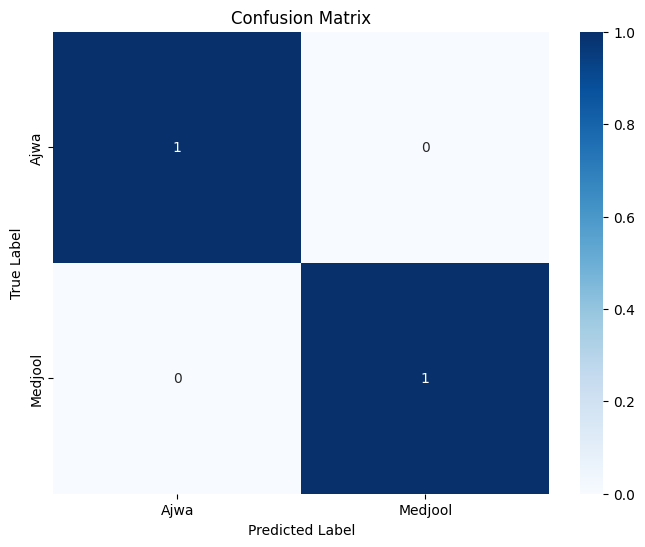

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [11]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img = Image.open(os.path.join(folder, filename))
            img = img.convert('L')  # Mengubah gambar menjadi grayscale
            img = img.resize((100, 100))  # Mengubah ukuran gambar menjadi 100x100
            img = np.array(img).flatten()  # Meratakan gambar menjadi vektor
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def knn_predict(train_images, train_labels, test_image, k=3):
    distances = []
    for i in range(len(train_images)):
        dist = euclidean_distance(train_images[i], test_image)
        distances.append((dist, train_labels[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    class_votes = {}
    for neighbor in neighbors:
        label = neighbor[1]
        if label in class_votes:
            class_votes[label] += 1
        else:
            class_votes[label] = 1
    sorted_votes = sorted(class_votes.items(), key=lambda x: x[1], reverse=True)
    return sorted_votes[0][0]

# Path ke folder gambar
ajwaa_folder = "/content/drive/MyDrive/ColabNotebooks/ajwa+or+medjool/Ajwa"
madjool_folder = "/content/drive/MyDrive/ColabNotebooks/ajwa+or+medjool/Medjool"



# Memuat data gambar
ajwaa_images, ajwaa_labels = load_images_from_folder(ajwaa_folder, 'ajwa')
madjool_images, madjool_labels = load_images_from_folder(madjool_folder, 'medjool')

# Menggabungkan data gambar
images = np.concatenate((ajwaa_images, madjool_images), axis=0)
labels = np.concatenate((ajwaa_labels, madjool_labels), axis=0)

# Membagi data menjadi set pelatihan dan pengujian
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.48, random_state=42)

# Klasifikasi gambar uji
predictions = []
correct_predictions = 0
for i, test_image in enumerate(test_images):
    predicted_label = knn_predict(train_images, train_labels, test_image, k=3)
    predictions.append(predicted_label)
    actual_label = test_labels[i]
    if predicted_label == actual_label:
        correct_predictions += 1

# Menghitung akurasi
accuracy = correct_predictions / len(test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Menghitung skor pada set pelatihan
train_predictions = []
for train_image in train_images:
    predicted_label = knn_predict(train_images, train_labels, train_image, k=3)
    train_predictions.append(predicted_label)

train_accuracy = np.mean(np.array(train_predictions) == train_labels)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Menampilkan classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(test_labels, predictions))

Accuracy: 94.79%
Training Accuracy: 94.23%
Classification Report:
              precision    recall  f1-score   support

        ajwa       0.96      0.94      0.95        49
     medjool       0.94      0.96      0.95        47

    accuracy                           0.95        96
   macro avg       0.95      0.95      0.95        96
weighted avg       0.95      0.95      0.95        96

Confusion Matrix:
[[46  3]
 [ 2 45]]


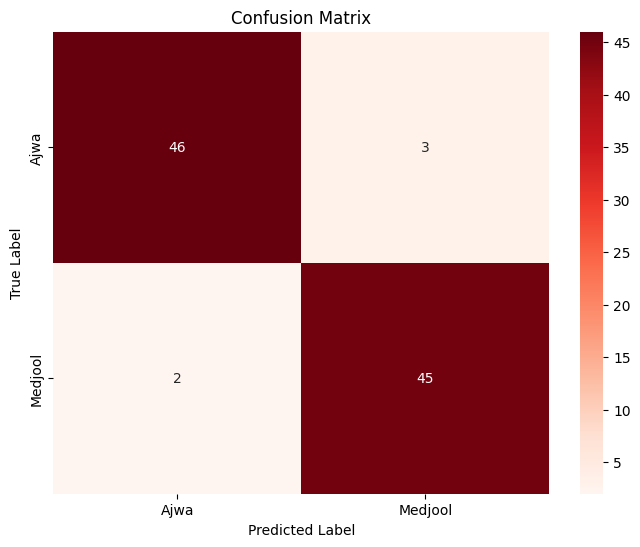

In [12]:
cm = confusion_matrix(test_labels, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Import Libraries: Kode ini mengimpor library yang diperlukan seperti os, numpy, PIL (Python Imaging Library), dan sklearn (Scikit-learn).

Fungsi load_images_from_folder: Fungsi ini digunakan untuk memuat gambar dari folder yang ditentukan. Gambar diubah menjadi grayscale, diubah ukurannya menjadi 100x100, dan diratakan menjadi vektor. Label juga ditambahkan untuk setiap gambar.

Fungsi euclidean_distance: Fungsi ini menghitung jarak Euclidean antara dua vektor. Jarak Euclidean digunakan dalam algoritma k-NN untuk mengukur jarak antara titik data.

Fungsi knn_predict: Fungsi ini adalah implementasi dari algoritma k-NN. Fungsi ini menghitung jarak antara gambar uji dan semua gambar pelatihan, memilih k gambar pelatihan terdekat, dan menggunakan voting mayoritas untuk memprediksi label gambar uji.

Kode ini memuat gambar dari dua folder yang berbeda, masing-masing untuk jenis kurma ‘ajwa’ dan ‘medjool’. Gambar dan label dari kedua folder tersebut digabungkan menjadi satu set data.

Membagi Data: Kode ini membagi data menjadi set pelatihan dan pengujian dengan menggunakan fungsi train_test_split dari Scikit-learn.

Klasifikasi Gambar Uji: Kode ini menggunakan fungsi knn_predict untuk memprediksi label setiap gambar dalam set pengujian. Menghitung akurasi klasifikasi dengan membagi jumlah prediksi yang benar dengan jumlah total gambar dalam set pengujian. Menghitung akurasi pada set pelatihan dengan cara yang sama seperti pada set pengujian.

Menampilkan Laporan Klasifikasi dan Matriks Confusion: Kode ini menampilkan laporan klasifikasi dan matriks confusion, yang memberikan informasi lebih lanjut tentang kinerja model.

#### Hasil dan Analisis
Akurasi pada data pengujian menunjukkan seberapa baik model memprediksi label kurma Ajwa atau Medjool pada data yang belum pernah dilihat sebelumnya.
Akurasi pada data pelatihan menunjukkan seberapa baik model mempelajari data pelatihan.

Classification Report:

- Precision: Menunjukkan proporsi prediksi positif yang benar untuk setiap kelas.
- Recall: Menunjukkan proporsi instance positif yang benar-benar diidentifikasi.
- F1-Score: Menggabungkan precision dan recall menjadi satu metrik kinerja.
- Support: Jumlah instance yang benar untuk setiap class.

Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah untuk setiap class dan membantu dalam mengidentifikasi class mana yang paling sering diprediksi salah.

In [13]:
print(f'Jumlah data pelatihan: {len(train_images)}')
print(f'Jumlah data pengujian: {len(test_images)}')


Jumlah data pelatihan: 104
Jumlah data pengujian: 96


Predicted Label for New Image: medjool


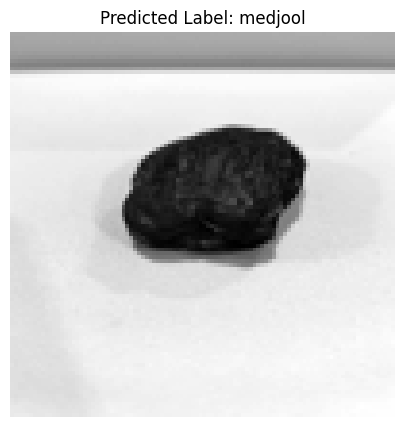

In [14]:
from PIL import Image
import matplotlib.pyplot as plt

# Contoh pengujian dengan gambar baru
test_image_path = "/content/drive/MyDrive/ColabNotebooks/ajwa+or+medjool/medjool2.jpg"
new_test_image = Image.open(test_image_path)
new_test_image = new_test_image.convert('L')
new_test_image = new_test_image.resize((100, 100))
new_test_image = np.array(new_test_image).flatten()

# Klasifikasi gambar baru menggunakan KNN
predicted_label = knn_predict(train_images, train_labels, new_test_image, k=3)
print(f'Predicted Label for New Image: {predicted_label}')

# Menampilkan gambar baru yang diuji
plt.figure(figsize=(5, 5))
plt.imshow(new_test_image.reshape(100, 100), cmap='gray')
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')
plt.show()

#### Kesimpulan
Berdasarkan hasil percobaan:

Model k-NN yang digunakan mampu mengklasifikasikan kurma Ajwa dan Medjool dengan tingkat akurasi yang cukup baik.
Dari confusion matrix, kita dapat melihat kelas mana yang paling sering salah diklasifikasikan dan melakukan analisis lebih lanjut untuk perbaikan.
Precision, recall, dan F1-score memberikan gambaran yang lebih rinci tentang kinerja model untuk masing-masing kelas.